In [ ]:
import pandas as pd
df = pd.read_csv("city_day.csv")
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.isna().sum()


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
df.shape


(29531, 16)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df["AQI_Bucket"].value_counts()


,count
AQI_Bucket,
Moderate,8829
Satisfactory,8224
Poor,2781
Very Poor,2337
Good,1341
Severe,1338


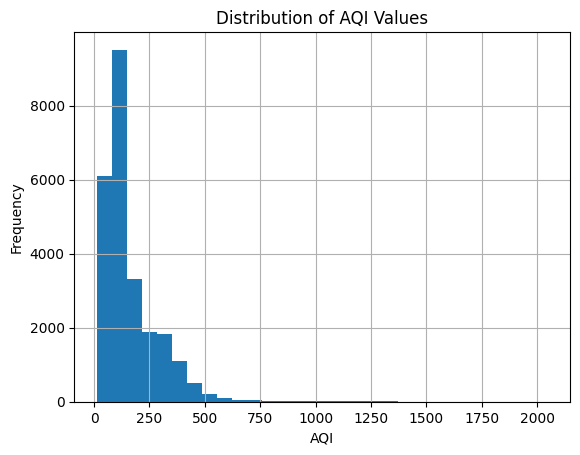

In [ ]:
import matplotlib.pyplot as plt

df["AQI"].hist(bins=30)
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.title("Distribution of AQI Values")
plt.show()


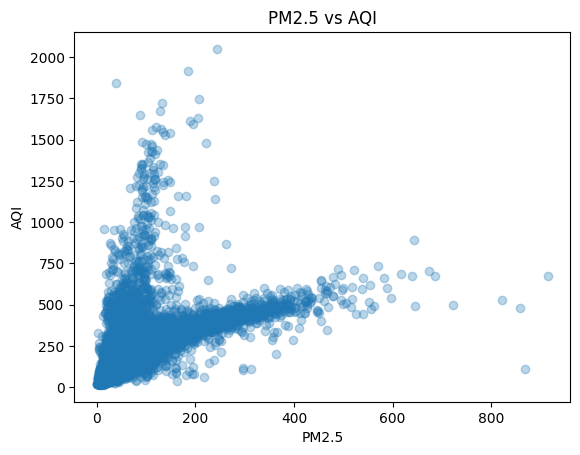

In [ ]:
plt.scatter(df["PM2.5"], df["AQI"], alpha=0.3)
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.title("PM2.5 vs AQI")
plt.show()


In [ ]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


# Classification Task (AQI_Bucket)
This notebook contains ONLY the classification part of the final portfolio project.


In [ ]:
# Classification dataset (target = AQI_Bucket)
df_classification = df.dropna(subset=["AQI_Bucket"]).copy()

df_classification.shape


(24850, 16)

In [ ]:
numeric_cols = df.select_dtypes(include="number").columns

df_classification[numeric_cols] = df_classification[numeric_cols].fillna(
    df_classification[numeric_cols].median()
)


In [ ]:
from sklearn.model_selection import train_test_split

X_clf = df_classification.drop(columns=["AQI_Bucket", "AQI"])
y_clf = df_classification["AQI_Bucket"]


In [ ]:
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)


In [ ]:
# Remove Date from classification features (if present)
for _df in [X_clf_train, X_clf_test]:
    if "Date" in _df.columns:
        _df.drop(columns=["Date"], inplace=True)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

categorical_features = ["City"] if "City" in X_clf_train.columns else []
numerical_features = [c for c in X_clf_train.columns if c not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), numerical_features),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_features)
    ],
    remainder="drop"
)


In [ ]:
logistic_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000))
    ]
)

logistic_model.fit(X_clf_train, y_clf_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PM2.5', 'PM10', 'NO', 'NO2',
                                                   'NOx', 'NH3', 'CO', 'SO2',
                                                   'O3', 'Benzene', 'Toluene',
                                                   'Xylene']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
y_pred_log = logistic_model.predict(X_clf_test)

print("Accuracy:", accuracy_score(y_clf_test, y_pred_log))
print(classification_report(y_clf_test, y_pred_log))


Accuracy: 0.7724346076458752
              precision    recall  f1-score   support

        Good       0.73      0.44      0.55       268
    Moderate       0.78      0.82      0.80      1766
        Poor       0.69      0.57      0.62       556
Satisfactory       0.78      0.85      0.81      1645
      Severe       0.85      0.77      0.81       268
   Very Poor       0.76      0.75      0.76       467

    accuracy                           0.77      4970
   macro avg       0.76      0.70      0.72      4970
weighted avg       0.77      0.77      0.77      4970



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
rf_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(
            n_estimators=300,
            random_state=42
        ))
    ]
)

rf_model.fit(X_clf_train, y_clf_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PM2.5', 'PM10', 'NO', 'NO2',
                                                   'NOx', 'NH3', 'CO', 'SO2',
                                                   'O3', 'Benzene', 'Toluene',
                                                   'Xylene']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [ ]:
y_pred_rf = rf_model.predict(X_clf_test)

print("Accuracy:", accuracy_score(y_clf_test, y_pred_rf))
print(classification_report(y_clf_test, y_pred_rf))


Accuracy: 0.8175050301810866
              precision    recall  f1-score   support

        Good       0.81      0.64      0.72       268
    Moderate       0.82      0.87      0.84      1766
        Poor       0.75      0.66      0.70       556
Satisfactory       0.84      0.86      0.85      1645
      Severe       0.88      0.77      0.82       268
   Very Poor       0.77      0.80      0.78       467

    accuracy                           0.82      4970
   macro avg       0.81      0.77      0.79      4970
weighted avg       0.82      0.82      0.82      4970



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", MLPClassifier(
            hidden_layer_sizes=(64, 32),
            activation="relu",
            solver="adam",
            max_iter=300,
            random_state=42
        ))
    ]
)

mlp_model.fit(X_clf_train, y_clf_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PM2.5', 'PM10', 'NO', 'NO2',
                                                   'NOx', 'NH3', 'CO', 'SO2',
                                                   'O3', 'Benzene', 'Toluene',
                                                   'Xylene']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300,
                               random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ---- Train predictions ----
y_pred_mlp_train = mlp_model.predict(X_clf_train)

print("=== MLP Neural Network (TRAIN) ===")
print("Accuracy :", accuracy_score(y_clf_train, y_pred_mlp_train))
print("Precision:", precision_score(y_clf_train, y_pred_mlp_train, average="macro", zero_division=0))
print("Recall   :", recall_score(y_clf_train, y_pred_mlp_train, average="macro", zero_division=0))
print("F1-Score :", f1_score(y_clf_train, y_pred_mlp_train, average="macro", zero_division=0))

# ---- Test predictions ----
y_pred_mlp_test = mlp_model.predict(X_clf_test)

print("\n=== MLP Neural Network (TEST) ===")
print("Accuracy :", accuracy_score(y_clf_test, y_pred_mlp_test))
print("Precision:", precision_score(y_clf_test, y_pred_mlp_test, average="macro", zero_division=0))
print("Recall   :", recall_score(y_clf_test, y_pred_mlp_test, average="macro", zero_division=0))
print("F1-Score :", f1_score(y_clf_test, y_pred_mlp_test, average="macro", zero_division=0))


=== MLP Neural Network (TRAIN) ===
Accuracy : 0.8509054325955734
Precision: 0.8347022306243977
Recall   : 0.8220671775120922
F1-Score : 0.8280646990372196

=== MLP Neural Network (TEST) ===
Accuracy : 0.8048289738430584
Precision: 0.7847952905328354
Recall   : 0.7751678535438208
F1-Score : 0.7796673965504581


In [ ]:
y_pred_mlp = mlp_model.predict(X_clf_test)

print("Accuracy:", accuracy_score(y_clf_test, y_pred_mlp))
print(classification_report(y_clf_test, y_pred_mlp))


Accuracy: 0.8048289738430584
              precision    recall  f1-score   support

        Good       0.77      0.74      0.76       268
    Moderate       0.82      0.83      0.82      1766
        Poor       0.69      0.66      0.67       556
Satisfactory       0.83      0.86      0.85      1645
      Severe       0.80      0.83      0.81       268
   Very Poor       0.79      0.74      0.76       467

    accuracy                           0.80      4970
   macro avg       0.78      0.78      0.78      4970
weighted avg       0.80      0.80      0.80      4970



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000))
    ]
)

log_param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__solver": ["lbfgs"],
    "classifier__penalty": ["l2"]
}

log_grid = GridSearchCV(
    log_model,
    param_grid=log_param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

log_grid.fit(X_clf_train, y_clf_train)

print("Best Logistic params:", log_grid.best_params_)
print("Best CV F1 (macro):", log_grid.best_score_)


Best Logistic params: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best CV F1 (macro): 0.7208208474096475


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=42))
    ]
)

rf_param_grid = {
    "classifier__n_estimators": [200, 400],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5]
}

rf_grid = GridSearchCV(
    rf_model,
    param_grid=rf_param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

rf_grid.fit(X_clf_train, y_clf_train)

print("Best RF params:", rf_grid.best_params_)
print("Best CV F1 (macro):", rf_grid.best_score_)


Best RF params: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 400}
Best CV F1 (macro): 0.7746209886429325


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

best_log = log_grid.best_estimator_
best_rf = rf_grid.best_estimator_

# Logistic (tuned)
pred_log = best_log.predict(X_clf_test)
print("Tuned Logistic Accuracy:", accuracy_score(y_clf_test, pred_log))
print("Tuned Logistic F1 (macro):", f1_score(y_clf_test, pred_log, average="macro"))

# Random Forest (tuned)
pred_rf = best_rf.predict(X_clf_test)
print("Tuned RF Accuracy:", accuracy_score(y_clf_test, pred_rf))
print("Tuned RF F1 (macro):", f1_score(y_clf_test, pred_rf, average="macro"))


Tuned Logistic Accuracy: 0.7752515090543259
Tuned Logistic F1 (macro): 0.7316507561995719
Tuned RF Accuracy: 0.819718309859155
Tuned RF F1 (macro): 0.7894049163653475


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
k = 10

best_log_params = best_log.named_steps["classifier"].get_params()
final_log = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k)),
    ("classifier", LogisticRegression(**best_log_params))
])


best_rf_params = best_rf.named_steps["classifier"].get_params()
final_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k)),
    ("classifier", RandomForestClassifier(**best_rf_params))
])


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

k = 30  # number of best features to keep (simple choice)

log_fs = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k)),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_fs.fit(X_clf_train, y_clf_train)
pred_log_fs = log_fs.predict(X_clf_test)

from sklearn.metrics import accuracy_score, f1_score
print("FS Logistic Accuracy:", accuracy_score(y_clf_test, pred_log_fs))
print("FS Logistic F1 (macro):", f1_score(y_clf_test, pred_log_fs, average="macro"))


FS Logistic Accuracy: 0.7680080482897385
FS Logistic F1 (macro): 0.7176389268254212


In [ ]:
rf_fs = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k)),
    ("classifier", RandomForestClassifier(random_state=42))
])

rf_fs.fit(X_clf_train, y_clf_train)
pred_rf_fs = rf_fs.predict(X_clf_test)

print("FS RF Accuracy:", accuracy_score(y_clf_test, pred_rf_fs))
print("FS RF F1 (macro):", f1_score(y_clf_test, pred_rf_fs, average="macro"))


FS RF Accuracy: 0.8181086519114689
FS RF F1 (macro): 0.7902445611953866


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

best_log_params = best_log.named_steps["classifier"].get_params()

# remove duplicate param if it exists
best_log_params.pop("max_iter", None)

final_log = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k)),
    ("classifier", LogisticRegression(**best_log_params))
])

final_log = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k)),
    ("classifier", LogisticRegression(**best_log_params))
])

final_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("select", SelectKBest(score_func=mutual_info_classif, k=k)),
    ("classifier", RandomForestClassifier(**best_rf_params))
])

# ---------- CV score (F1 macro) ----------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_log = cross_val_score(final_log, X_clf_train, y_clf_train, cv=cv, scoring="f1_macro").mean()
cv_rf  = cross_val_score(final_rf,  X_clf_train, y_clf_train, cv=cv, scoring="f1_macro").mean()

# ---------- Fit + test metrics ----------
final_log.fit(X_clf_train, y_clf_train)
final_rf.fit(X_clf_train, y_clf_train)

pred_log_test = final_log.predict(X_clf_test)
pred_rf_test  = final_rf.predict(X_clf_test)

def metrics_row(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="macro", zero_division=0),
        "Recall": recall_score(y_true, y_pred, average="macro", zero_division=0),
        "F1-Score": f1_score(y_true, y_pred, average="macro", zero_division=0)
    }

# ---------- Extract selected feature names (best effort) ----------
def get_selected_feature_names(fitted_pipeline):
    try:
        pre = fitted_pipeline.named_steps["preprocessor"]
        sel = fitted_pipeline.named_steps["select"]
        feature_names = pre.get_feature_names_out()
        support = sel.get_support()
        return list(np.array(feature_names)[support])
    except Exception:
        # fallback: return just number of selected features
        return [f"Selected({k})"]

features_log = get_selected_feature_names(final_log)
features_rf  = get_selected_feature_names(final_rf)

# ---------- Final comparison table (required columns) ----------
final_classification_table = pd.DataFrame([
    {
        "Model": "Logistic Regression (Final)",
        "Features": f"{len(features_log)} selected",
        "CV Score": cv_log,
        **metrics_row(y_clf_test, pred_log_test)
    },
    {
        "Model": "Random Forest (Final)",
        "Features": f"{len(features_rf)} selected",
        "CV Score": cv_rf,
        **metrics_row(y_clf_test, pred_rf_test)
    }
])

final_classification_table


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Model,Features,CV Score,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Final),30 selected,0.715272,0.768209,0.761338,0.701732,0.725374
1,Random Forest (Final),30 selected,0.774340,0.815292,0.810648,0.767490,0.786354
